In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/cybersecurity_attacks_cleaned.csv')

# 1. QUESTION
<h4 style="font-weight: bold; color: #F2BEFC"> What role does proxy usage play in the frequency and severity of attacks during high-anomaly periods, and how does this vary across time and attack type?</h4>

# 2. TARGET COLUMNS

To find out the role of proxy usage, we will focus on analyzing the following columns:

- `Proxy Information`: information about proxy servers or intermediary servers (`No Proxy` or **the address of the proxy server**)
- `Anomaly Score`: indicating deviations from expected behavior (float, ranging from 0-100)
- `Severity Level`: indicating the severity of the attack (Low, Medium, High)

To expand the question on how the role varies across attack types, we will consider the following columns:

- `Attack Type`: the type of attack (available: `DDoS`, `Malware`, `Intrusion`)

We will also take time-related columns into account, and group the data by:
- `Hour`: the hour of the day
- `DayofWeek`: the day of the week
- `Month`: the month of the year
- `Year`: the year

To find out the role of proxy usage in the frequency and severity of attacks during high-anomaly periods, we will split the analysis into two parts:
- **Frequency of attacks**: analyze the number of attacks for proxy and non-proxy devices during high-anomaly periods.
- **Severity of attacks**: analyze the severity of attacks for proxy and non-proxy devices during high-anomaly periods.

We will assume high-anomaly periods as periods with `Anomaly Score` greater than the 75th percentile (3rd quartile).

In [33]:
Q3 = df['Anomaly Scores'].quantile(0.75).round()
print(f"Records that has Anomaly Score > {Q3} will be considered high anomaly")

high_anomaly = df[df['Anomaly Scores'] > Q3].copy()
# high_anomaly = df.copy()

high_anomaly['Proxy Usage'] = high_anomaly['Proxy Information'].apply(lambda x: "No Proxy" if x == "No Proxy" else "Proxy")

Records that has Anomaly Score > 75.0 will be considered high anomaly


# 3. ANALYSIS
### **3.1. Proxy Usage and Frequency of Attacks**

Initially, we will need to analyze the use of proxy devices to gain insights on whether or not having proxy configured on your devices effectively prevent attacks. We will analyze the number of attacks for proxy and non-proxy devices during high-anomaly periods.

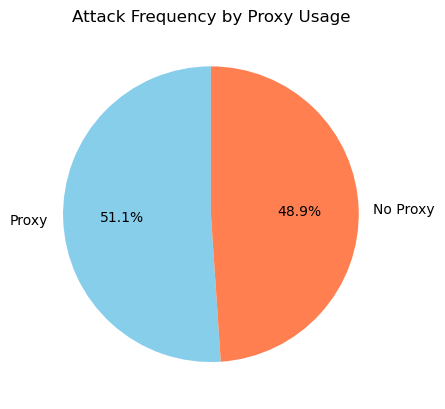

In [34]:
proxy_counts = high_anomaly['Proxy Usage'].value_counts()

# proxy_counts.plot(kind='bar', color=['skyblue', 'coral'])
plt.pie(proxy_counts, labels=proxy_counts.index, autopct='%1.1f%%', colors=['skyblue', 'coral'], startangle=90)
plt.title('Attack Frequency by Proxy Usage')
plt.xticks(rotation=0)
plt.show()

It seems there is no significant difference in the number of attacks between proxy and non-proxy devices.

However, we can still see that the frequency of attacks is higher for **proxy** devices compared to **non-proxy**.

### 3.2. **Frequency by Severity Level**

Compare the distribution of severity levels between proxy and non-proxy devices.

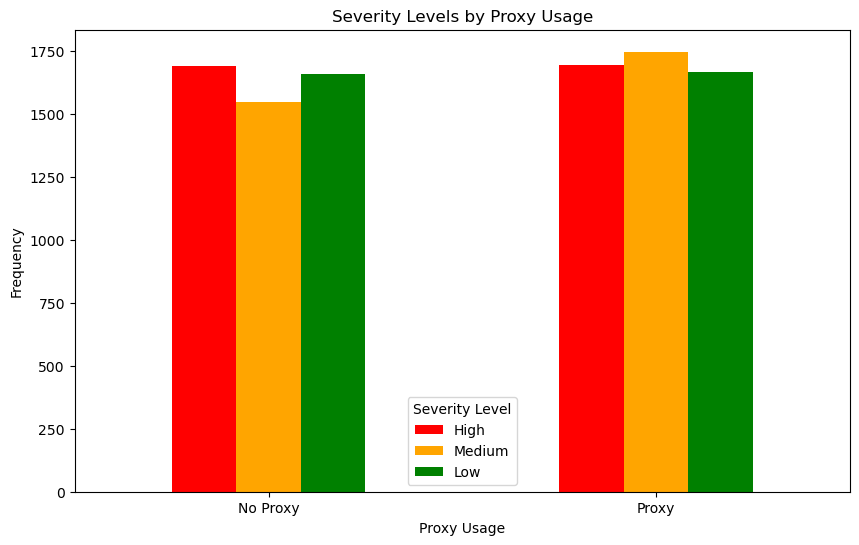

In [35]:
severity_distribution = high_anomaly.groupby(['Proxy Usage', 'Severity Level']).size().unstack()

# sort the severity levels by: High, Medium, Low
severity_distribution = severity_distribution[['High', 'Medium', 'Low']]

severity_distribution.plot(kind='bar', figsize=(10, 6), color=['red', 'orange', 'green'])

plt.title("Severity Levels by Proxy Usage")
plt.xlabel("Proxy Usage")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(title="Severity Level")
plt.show()

- The **Severity Level** of `High` is more common for **non-proxy** devices.
- The **Severity Level** of `Medium` is more common for **proxy** devices.
- The **Severity Level** of `Low` is more common for **non-proxy** devices.

This suggests that on **Proxy** devices, the severity of attacks are evenly spread out across all levels, while on **non-proxy** devices, the severity of attacks are either toward `Low` or `High`.

### **3.3. Frequency by Attack types**

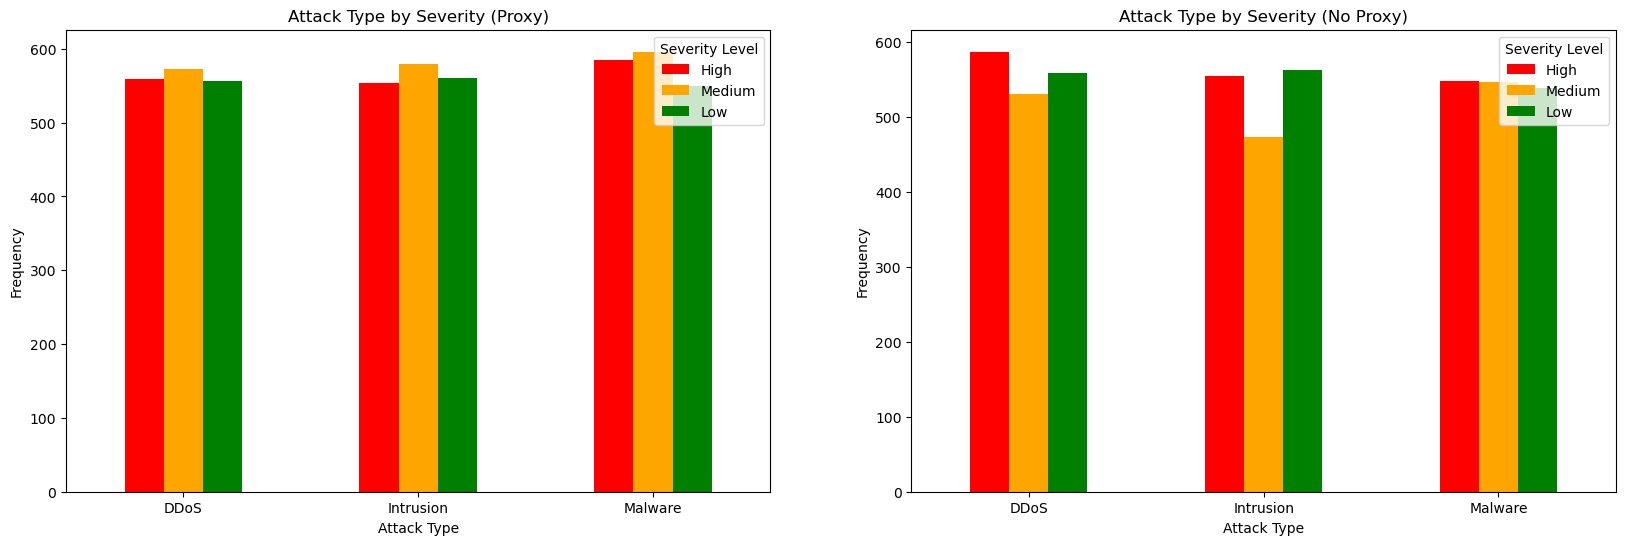

In [36]:
# group by 3 columns: Severity Level, Attack Type and Anomaly Scores, on 2 datasets derived from high_anomaly: proxy and no_proxy
proxy_df = high_anomaly[high_anomaly['Proxy Usage'] == 'Proxy']
no_proxy_df = high_anomaly[high_anomaly['Proxy Usage'] == 'No Proxy']

proxy_grouped = proxy_df.groupby(['Attack Type', 'Severity Level']).size().unstack()
no_proxy_grouped = no_proxy_df.groupby(['Attack Type', 'Severity Level']).size().unstack()

# sort severity level
proxy_grouped = proxy_grouped[['High', 'Medium', 'Low']]
no_proxy_grouped = no_proxy_grouped[['High', 'Medium', 'Low']]

# visualize each group separately
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

proxy_grouped.plot(kind='bar', ax=ax[0], color=['red', 'orange', 'green'])
ax[0].set_title("Attack Type by Severity (Proxy)")
ax[0].set_xlabel("Attack Type")
ax[0].set_ylabel("Frequency")
ax[0].legend(title="Severity Level")
ax[0].set_xticklabels(proxy_grouped.index, rotation=0)


no_proxy_grouped.plot(kind='bar', ax=ax[1], color=['red', 'orange', 'green'])
ax[1].set_title("Attack Type by Severity (No Proxy)")
ax[1].set_xlabel("Attack Type")
ax[1].set_ylabel("Frequency")
ax[1].legend(title="Severity Level")
ax[1].set_xticklabels(no_proxy_grouped.index, rotation=0)

plt.show()

**Malware** attacks are more common for **proxy** devices, while **DDoS** and **Intrusion** leave a heavier impact on devices **without proxy** configuration.

### **3.4. Time-based Analysis**

We will analyze how often attacks occur during different
- Hours of the day
- Days of the week
- Monthly
- Yearly

#### 3.4.1. Hours of the day

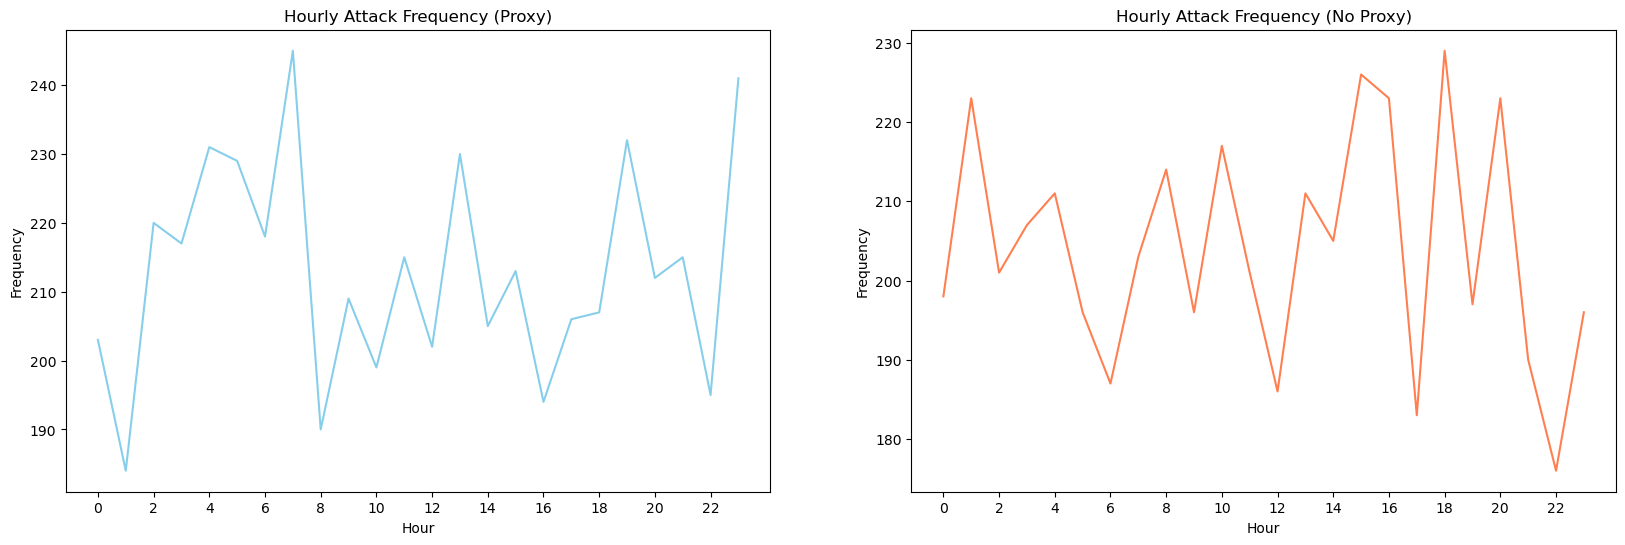

In [37]:
hourly_proxy = proxy_df.groupby('Hour').size()
hourly_no_proxy = no_proxy_df.groupby('Hour').size()

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

hourly_proxy.plot(kind='line', ax=ax[0], color='skyblue')
ax[0].set_title("Hourly Attack Frequency (Proxy)")
ax[0].set_xlabel("Hour")
ax[0].set_ylabel("Frequency")
ax[0].set_xticks(range(0, 24, 2))

hourly_no_proxy.plot(kind='line', ax=ax[1], color='coral')
ax[1].set_title("Hourly Attack Frequency (No Proxy)")
ax[1].set_xlabel("Hour")
ax[1].set_ylabel("Frequency")
ax[1].set_xticks(range(0, 24, 2))


plt.show()

For **Proxy** configured devices, the frequency of attacks is higher during the **early hours of the day**.

For **Non-Proxy** configured devices, the frequency of attacks is generally spread throughout the day and seems to not follow a specific pattern.

The diffrence between these two proxy usage is that the frequency of attacks if more systematic for **Proxy** devices compared to **Non-Proxy**.

#### 3.4.2. Days of the week

/tmp/ipykernel_50523/3499312810.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_proxy = proxy_df.groupby('DayofWeekLiteral').size()
/tmp/ipykernel_50523/3499312810.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_no_proxy = no_proxy_df.groupby('DayofWeekLiteral').size()


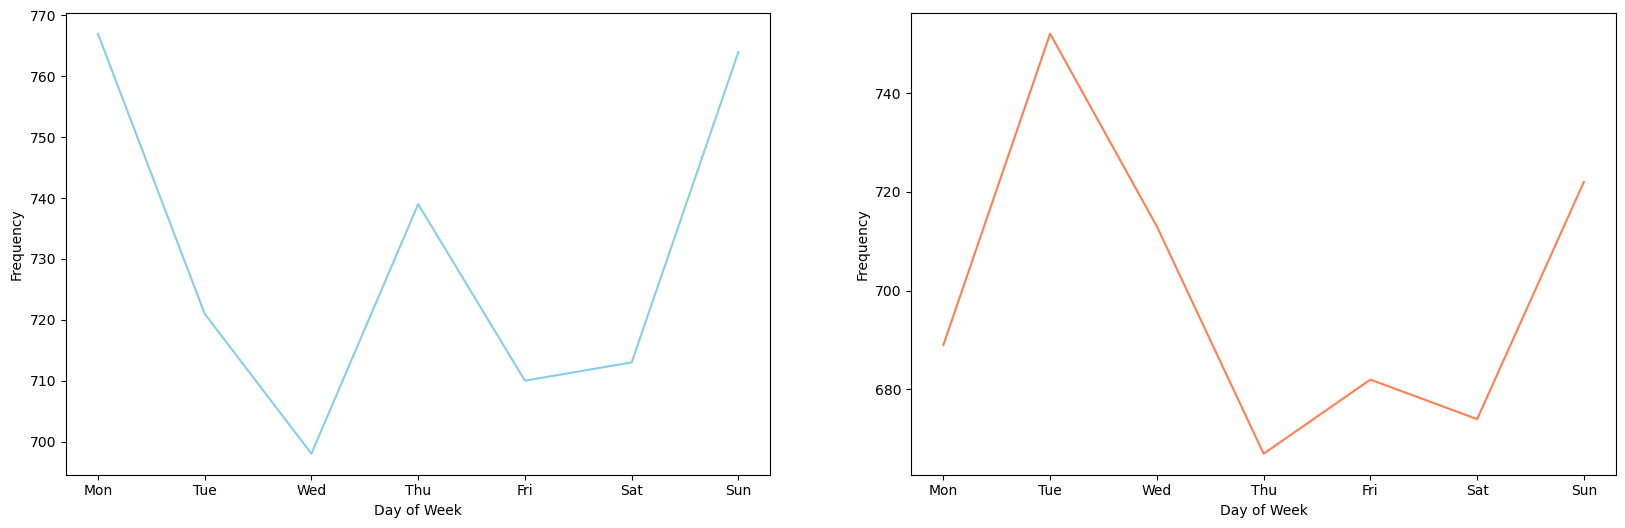

In [42]:
dayofweek = {
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
}

proxy_df.loc[:,'DayofWeekLiteral'] = proxy_df['DayofWeek'].map(dayofweek)
no_proxy_df.loc[:,'DayofWeekLiteral'] = no_proxy_df['DayofWeek'].map(dayofweek)

# sort by day of week: mon, tue, wed, thu, fri, sat, sun
proxy_df.loc[:, 'DayofWeekLiteral'] = pd.Categorical(proxy_df['DayofWeekLiteral'], categories=dayofweek.values(), ordered=True)
no_proxy_df.loc[:,'DayofWeekLiteral'] = pd.Categorical(no_proxy_df['DayofWeekLiteral'], categories=dayofweek.values(), ordered=True)

weekly_proxy = proxy_df.groupby('DayofWeekLiteral').size()
weekly_no_proxy = no_proxy_df.groupby('DayofWeekLiteral').size()

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

weekly_proxy.plot(kind='line', ax=ax[0], color='skyblue')
ax[0].set_xlabel("Day of Week")
ax[0].set_ylabel("Frequency")

weekly_no_proxy.plot(kind='line', ax=ax[1], color='coral')
ax[1].set_xlabel("Day of Week")
ax[1].set_ylabel("Frequency")

plt.show()

For **Proxy** configured devices, the frequency of attacks spikes on **Monday** and **Sunday**.

For **Non-Proxy** configured devices, the frequency of attacks is high on **Monday** and spikes on **Sunday** and **Tuesday**.

### 3.4.3. Month of Year

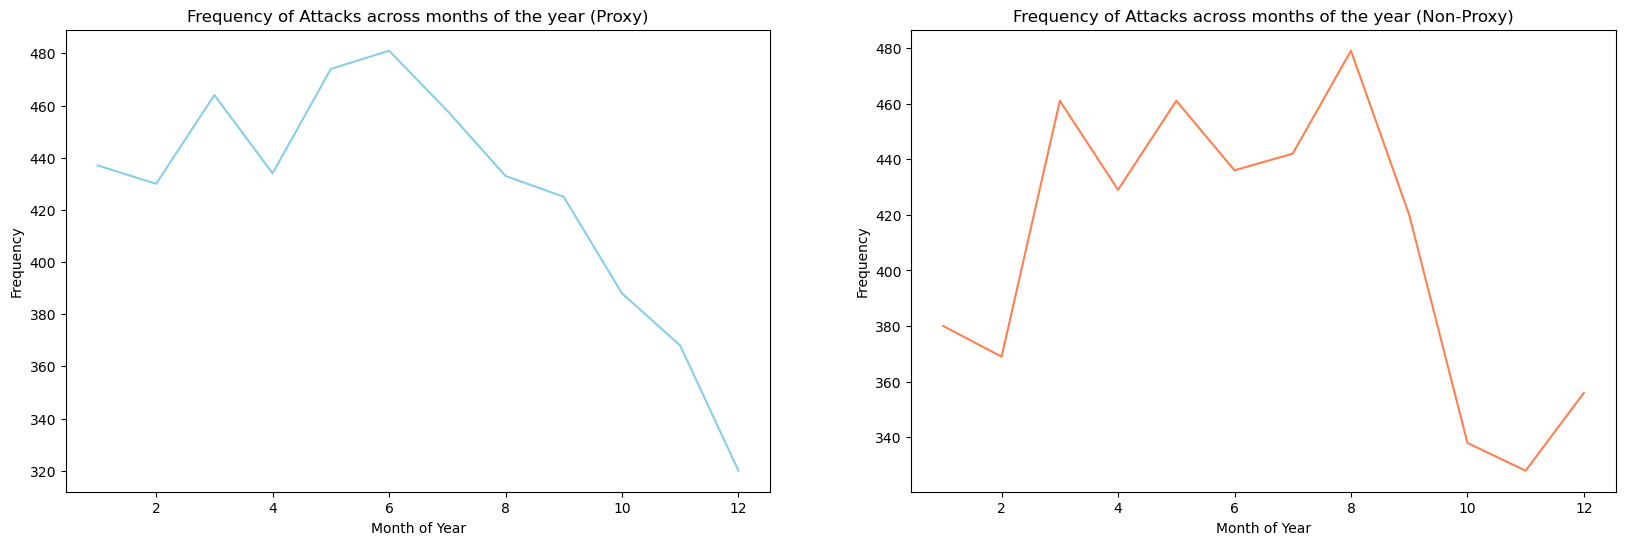

In [39]:
monthly_proxy = proxy_df.groupby('Month').size()
monthly_no_proxy = no_proxy_df.groupby('Month').size()

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

monthly_proxy.plot(kind='line', ax=ax[0], color='skyblue')
ax[0].set_xlabel("Month of Year")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Frequency of Attacks across months of the year (Proxy)")

monthly_no_proxy.plot(kind='line', ax=ax[1], color='coral')
ax[1].set_xlabel("Month of Year")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Frequency of Attacks across months of the year (Non-Proxy)")

plt.show()

For **Proxy** configured devices, the frequency of attacks peaks on **March** and **June**.

For **Non-Proxy** configured devices, the frequency of attacks peaks on **March**, **May**, **August**.

### 3.4.4 Yearly

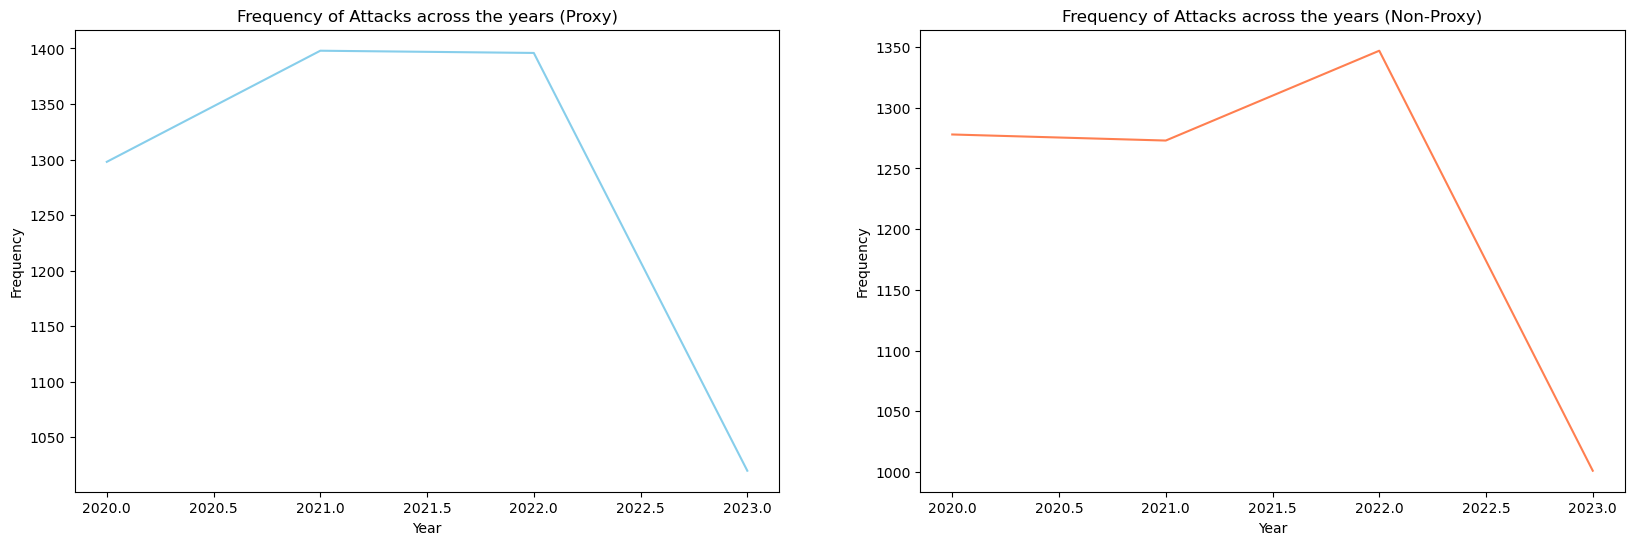

In [40]:
proxy_df.loc[:, 'Year'] = proxy_df['Year'].round().astype(int)
no_proxy_df.loc[:, 'Year'] = no_proxy_df['Year'].round().astype(int)

yearly_proxy = proxy_df.groupby('Year').size()
yearly_no_proxy = no_proxy_df.groupby('Year').size()

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

yearly_proxy.plot(kind='line', ax=ax[0], color='skyblue')
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Frequency of Attacks across the years (Proxy)")

yearly_no_proxy.plot(kind='line', ax=ax[1], color='coral')
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Frequency of Attacks across the years (Non-Proxy)")

plt.show()

For **Proxy** configured devices, the frequency of attacks peaks during **2021 and 2022**

For **Non-Proxy** configured devices, the frequency of attacks peaks on **2022**